<a href="https://colab.research.google.com/github/Ahmah328/Deep-Learning/blob/main/comprehensive_strength_concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['compresive_strength_concrete.csv']))
# Dataset is now stored in a Pandas Dataframe

# ***Load Data***

In [ ]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
data = data.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"cement",
                        "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"slag",
                        "Fly Ash (component 3)(kg in a m^3 mixture)":"ash",
                        "Water  (component 4)(kg in a m^3 mixture)":"water",
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":"superplastic",
                        "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"coarseagg",
                        "Fine Aggregate (component 7)(kg in a m^3 mixture)":"fineagg",
                        "Age (day)":"age",
                        "Concrete compressive strength(MPa, megapascals) ":"strength"})

In [ ]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


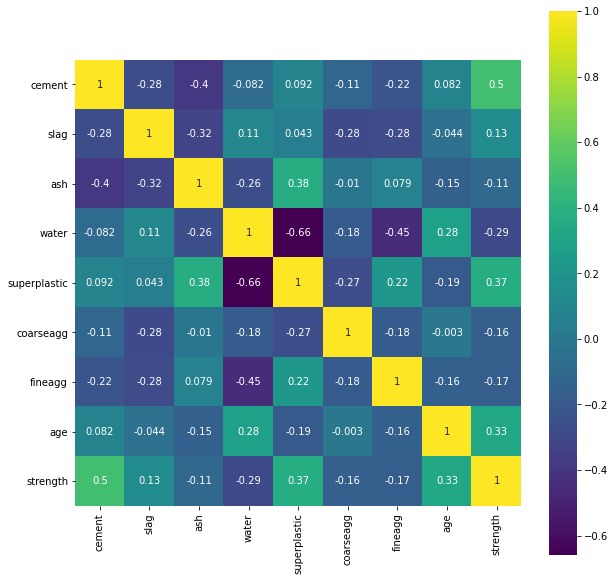

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),square=True,annot=True,cmap='viridis');

# ***Splitting The data into target and other input***

In [ ]:
X = data.drop('strength',axis=1)
Y = data['strength']

In [ ]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
Y=np.asarray(Y)

In [ ]:
print(type(Y))
Y

<class 'numpy.ndarray'>


array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

# ***Splitting the data into training and testing***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


# ***Preparing the Data***

In [ ]:
mean = X_train.mean(axis=0)
X_train -= mean

std = X_train.std(axis=0)
X_train /= std
X_test -=mean
X_test /=std

# ***Building Network***

In [ ]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation = 'relu', input_shape = (X_train.shape[1],)))
  model.add(layers.Dense(8,activation='relu'))
  model.add(layers.Dense(6,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer= 'rmsprop', loss='mse', metrics = ['mae'])
  return model


# ***K-Fold Validation***

In [ ]:
k=5
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print("Processing Fold #", i)
  val_data = X_train[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]],axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 1)
  val_mse, val_mae =model.evaluate(val_data, val_targets, verbose = 1)
  all_scores.append(val_mae)

Processing Fold # 0
Epoch 1/100
577/577 [==============================] - 1s 721us/step - loss: 1398.4107 - mae: 33.2692
Epoch 2/100
577/577 [==============================] - 0s 738us/step - loss: 595.7972 - mae: 19.1273
Epoch 3/100
577/577 [==============================] - 0s 809us/step - loss: 258.6113 - mae: 12.5650
Epoch 4/100
577/577 [==============================] - 0s 781us/step - loss: 177.2591 - mae: 10.6334
Epoch 5/100
577/577 [==============================] - 0s 769us/step - loss: 139.8761 - mae: 9.4247
Epoch 6/100
577/577 [==============================] - 0s 729us/step - loss: 142.0608 - mae: 9.4412
Epoch 7/100
577/577 [==============================] - 0s 768us/step - loss: 151.7457 - mae: 9.5684
Epoch 8/100
577/577 [==============================] - 0s 759us/step - loss: 139.6612 - mae: 9.2163
Epoch 9/100
577/577 [==============================] - 0s 780us/step - loss: 151.9247 - mae: 9.6479
Epoch 10/100
577/577 [==============================] - 0s 779us/step - los

In [ ]:
all_scores

[5.363771915435791,
 4.71453332901001,
 4.465490341186523,
 4.475654602050781,
 5.240728378295898]

In [ ]:
np.mean(all_scores)

4.852035713195801

# ***Saving the Validation Log at each fold***

In [ ]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
  print("Processing Fold #", i)
  val_data = X_train[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data,val_targets),epochs = num_epochs, batch_size = 1, verbose = 1)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Processing Fold # 0
Epoch 1/200
577/577 [==============================] - 1s 2ms/step - loss: 1518.2007 - mae: 35.1934 - val_loss: 1032.0575 - val_mae: 27.9282
Epoch 2/200
577/577 [==============================] - 1s 870us/step - loss: 858.3880 - mae: 24.2034 - val_loss: 243.3327 - val_mae: 12.6211
Epoch 3/200
577/577 [==============================] - 1s 866us/step - loss: 214.0383 - mae: 11.7909 - val_loss: 172.5735 - val_mae: 10.7561
Epoch 4/200
577/577 [==============================] - 1s 908us/step - loss: 162.8774 - mae: 10.5182 - val_loss: 157.2549 - val_mae: 10.1983
Epoch 5/200
577/577 [==============================] - 1s 875us/step - loss: 147.1706 - mae: 9.8788 - val_loss: 160.2617 - val_mae: 9.9565
Epoch 6/200
577/577 [==============================] - 1s 936us/step - loss: 132.1393 - mae: 9.1380 - val_loss: 159.7506 - val_mae: 9.8961
Epoch 7/200
577/577 [==============================] - 1s 955us/step - loss: 129.1861 - mae: 8.9300 - val_loss: 166.3136 - val_mae: 9.8928

In [ ]:
average_mae_history = [np.mean( [x[i] for x in all_mae_histories] ) for i in range(num_epochs)]

In [ ]:
print(average_mae_history)
print("Length of Average MAE History",len(average_mae_history))

[26.35317916870117, 12.424953651428222, 10.637599182128906, 9.957967758178711, 9.591829872131347, 9.257350540161132, 9.174456787109374, 8.956735801696777, 8.778013801574707, 8.65567045211792, 8.503957653045655, 8.355942821502685, 8.274811553955079, 8.158070278167724, 8.12420825958252, 7.983188629150391, 7.820202350616455, 7.743875503540039, 7.680972766876221, 7.525164699554443, 7.451084327697754, 7.354049587249756, 7.195922183990478, 7.181382274627685, 7.11456298828125, 6.915023517608643, 6.850656509399414, 6.754397869110107, 6.686944007873535, 6.575805759429931, 6.522750282287598, 6.474409008026123, 6.370339393615723, 6.209871292114258, 6.197837066650391, 6.1931685447692875, 6.134634208679199, 6.031866931915284, 6.059233474731445, 6.001992511749267, 5.988877487182617, 5.86420783996582, 5.96694164276123, 5.925549030303955, 5.94099760055542, 5.911495208740234, 5.869381999969482, 5.809839725494385, 5.845535945892334, 5.752162456512451, 5.70401611328125, 5.715693473815918, 5.7422802925109

# ***Plotting***

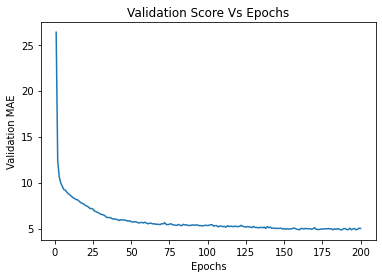

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title("Validation Score Vs Epochs")
plt.show()

# ***Plotting validation scores***

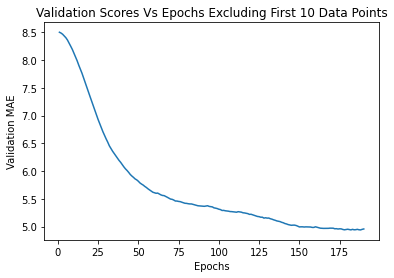

In [ ]:
def smooth_curve(points, factor= 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation Scores Vs Epochs Excluding First 10 Data Points')
plt.show()

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.02),input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.02) ,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train,y_train,epochs=500,batch_size=128,validation_data=(val_data,val_targets))

Epoch 1/500
6/6 [==============================] - 1s 37ms/step - loss: 1575.8704 - mae: 35.8167 - val_loss: 1612.5709 - val_mae: 36.2316
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 1516.4762 - mae: 34.9699 - val_loss: 1580.3833 - val_mae: 35.8130
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 1474.4859 - mae: 34.5751 - val_loss: 1544.5211 - val_mae: 35.3425
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 1450.3887 - mae: 34.2608 - val_loss: 1503.0077 - val_mae: 34.7879
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 1359.0782 - mae: 32.9066 - val_loss: 1452.0050 - val_mae: 34.0919
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 1311.8670 - mae: 32.3918 - val_loss: 1388.0317 - val_mae: 33.1912
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 1248.1749 - mae: 31.2190 - val_loss: 1312.2125 - val_mae: 32.0977
Epoch 8/500
6/6 [=====================

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 997us/step - loss: 83.6743 - mae: 7.1601


In [ ]:
print("test_mae_score:",test_mae_score)
print("test_mse_score:",test_mse_score)

test_mae_score: 7.160136699676514
test_mse_score: 83.67427825927734


# ***Retraining the model with changing Hyperparameters***

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.02),input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,kernel_regularizer=regularizers.l2(0.02) ,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train,y_train,epochs=500,batch_size=64,validation_data=(val_data,val_targets))

Epoch 1/500
12/12 [==============================] - 1s 17ms/step - loss: 1572.4820 - mae: 35.9297 - val_loss: 1650.8529 - val_mae: 36.7042
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 1605.3644 - mae: 36.1380 - val_loss: 1648.2129 - val_mae: 36.6693
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 1503.4369 - mae: 35.1117 - val_loss: 1645.6930 - val_mae: 36.6359
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 1490.2779 - mae: 35.1378 - val_loss: 1642.6182 - val_mae: 36.5950
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 1486.5484 - mae: 34.7733 - val_loss: 1639.6788 - val_mae: 36.5564
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 1585.7659 - mae: 36.0270 - val_loss: 1636.5312 - val_mae: 36.5141
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 1515.1980 - mae: 34.9913 - val_loss: 1633.0956 - val_mae: 36.4689
Epoch 8/500
12/12 [=======

# ***Final Model***

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.02),input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.02) ,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train,y_train,epochs=1000,batch_size=128,validation_data=(val_data,val_targets))

Epoch 1/1000
6/6 [==============================] - 1s 41ms/step - loss: 1548.2293 - mae: 35.4497 - val_loss: 1566.5867 - val_mae: 35.5760
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 1467.7613 - mae: 34.4194 - val_loss: 1459.6052 - val_mae: 34.1402
Epoch 3/1000
6/6 [==============================] - 0s 9ms/step - loss: 1345.0149 - mae: 32.8000 - val_loss: 1312.5475 - val_mae: 32.0646
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 1172.6649 - mae: 30.3251 - val_loss: 1126.9386 - val_mae: 29.2872
Epoch 5/1000
6/6 [==============================] - 0s 11ms/step - loss: 990.3906 - mae: 27.2278 - val_loss: 915.8054 - val_mae: 25.7845
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 839.8883 - mae: 24.1704 - val_loss: 712.3810 - val_mae: 22.0366
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 662.2422 - mae: 21.2648 - val_loss: 525.5447 - val_mae: 18.2657
Epoch 8/1000
6/6 [===================

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 48.4306 - mae: 5.0971


In [ ]:
print("test_mae_score:",test_mae_score)
print("test_mse_score:",test_mse_score)

test_mae_score: 5.097078323364258
test_mse_score: 48.43064880371094
